** install and imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import yfinance as yf


In [2]:
# List of 5 blue-chip stocks (for example)
stocks = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA']

# Function to fetch historical stock data
def fetch_data(stocks, start_date, end_date):
    stock_data = {}
    for stock in stocks:
        data = yf.download(stock, start=start_date, end=end_date)
        stock_data[stock] = data
    return stock_data

# Example usage
if __name__ == "__main__":
    stock_data = fetch_data(stocks, '2015-01-01', '2024-01-01')
    # Save data to CSV files
    for stock, data in stock_data.items():
        data.to_csv(f"{stock}_data.csv")
    print("Data collection complete!")


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Data collection complete!


In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load stock data
def load_and_preprocess_data():
    stocks = ['AAPL', 'AMZN', 'GOOGL', 'MSFT', 'TSLA']
    data = {}
    
    for stock in stocks:
        try:
            # Load data for each stock
            df = pd.read_csv(f'{stock}_data.csv')
            print(f"Loaded {stock} data with columns: {df.columns}")

            # Ensure 'Date' column exists
            if 'Date' not in df.columns:
                raise KeyError(f"Date column not found in {stock}_data.csv")

            # Convert 'Date' to datetime and set as index
            df['Date'] = pd.to_datetime(df['Date'])
            df.set_index('Date', inplace=True)
            df['Stock'] = stock
            df = df[['Close', 'Stock']]  # We will predict the 'Close' price

            # Add to dictionary
            data[stock] = df
        except Exception as e:
            print(f"Error loading data for {stock}: {e}")
            continue  # Skip to the next stock if an error occurs

    # Combine all stock data
    if data:
        combined_data = pd.concat(data.values(), axis=0)
        print("Combined data loaded successfully.")
    else:
        raise ValueError("No stock data could be loaded.")

    # Lagging features (shifted columns for prediction)
    combined_data['Prev_Close'] = combined_data.groupby('Stock')['Close'].shift(1)

    # Drop missing values
    combined_data = combined_data.dropna()
    
    return combined_data

# Split the data into features (X) and target (y)
def prepare_data():
    data = load_and_preprocess_data()
    X = data[['Prev_Close']]  # Previous day's close as a feature
    y = data['Close']  # Today's close as the target
    
    # Split data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Feature scaling
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    return X_train, X_test, y_train, y_test

if __name__ == "__main__":
    X_train, X_test, y_train, y_test = prepare_data()
    print("Data preprocessing complete!")


Loaded AAPL data with columns: Index(['Date', 'Price', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')
Loaded AMZN data with columns: Index(['Date', 'Price', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')
Loaded GOOGL data with columns: Index(['Date', 'Price', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')
Loaded MSFT data with columns: Index(['Date', 'Price', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')
Loaded TSLA data with columns: Index(['Date', 'Price', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')
Combined data loaded successfully.
Data preprocessing complete!


In [17]:
# Train and evaluate the model
def train_model():
    X_train, X_test, y_train, y_test = prepare_data()
    
    # Initialize and train the model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Model Performance:")
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared: {r2}")

    return model

if __name__ == "__main__":
    model = train_model()


Loaded AAPL data with columns: Index(['Date', 'Price', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')
Loaded AMZN data with columns: Index(['Date', 'Price', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')
Loaded GOOGL data with columns: Index(['Date', 'Price', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')
Loaded MSFT data with columns: Index(['Date', 'Price', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')
Loaded TSLA data with columns: Index(['Date', 'Price', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')
Combined data loaded successfully.
Model Performance:
Mean Squared Error: 11.18305364548395
R-squared: 0.998364353617023


Loaded AAPL data with columns: Index(['Date', 'Price', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')
Loaded AMZN data with columns: Index(['Date', 'Price', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')
Loaded GOOGL data with columns: Index(['Date', 'Price', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')
Loaded MSFT data with columns: Index(['Date', 'Price', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')
Loaded TSLA data with columns: Index(['Date', 'Price', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')
Combined data loaded successfully.
Loaded AAPL data with columns: Index(['Date', 'Price', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')
Loaded AMZN data with columns: Index(['Date', 'Price', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')
Loaded GOOGL data with columns: Index(['Date', 'Price', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')
Loaded MSFT data with columns: Index(['Date', 'Pric

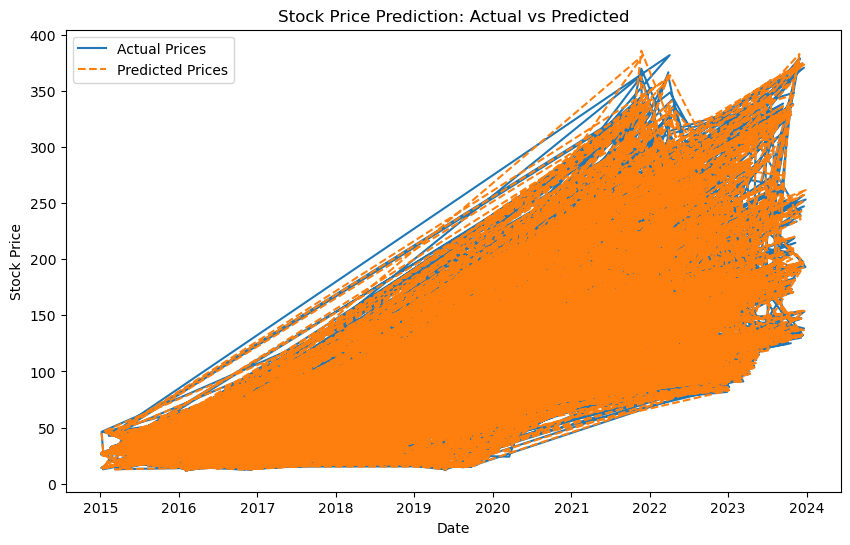

In [21]:

def visualize_results():
    X_train, X_test, y_train, y_test = prepare_data()
    model = train_model()
    
    y_pred = model.predict(X_test)
    
    # Plot Actual vs Predicted Prices
    plt.figure(figsize=(10, 6))
    plt.plot(y_test.index, y_test, label='Actual Prices')
    plt.plot(y_test.index, y_pred, label='Predicted Prices', linestyle='--')
    plt.title('Stock Price Prediction: Actual vs Predicted')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()

if __name__ == "__main__":
    visualize_results()
